# 2023 Day 3

https://adventofcode.com/2023/day/3

https://adventofcode.com/2023/day/3/input

In [1]:
from collections import defaultdict

import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from scipy import ndimage

In [2]:
inp = open('input-03.txt').readlines()
# inp

In [3]:
A = np.array(list(map(list, inp)))
A

array([['.', '.', '.', ..., '4', '1', '\n'],
       ['.', '.', '.', ..., '.', '.', '\n'],
       ['.', '.', '.', ..., '6', '6', '\n'],
       ...,
       ['.', '.', '.', ..., '.', '.', '\n'],
       ['.', '.', '.', ..., '.', '.', '\n'],
       ['.', '.', '5', ..., '.', '.', '\n']], dtype='<U1')

In [4]:
nrow, ncol = A.shape
nrow, ncol

(140, 141)

## Part 1

In [5]:
digits = list('0123456789')
print(digits)

chars = A.ravel()
symbols = np.unique(chars[~np.isin(chars, digits) & (~np.isin(chars, list('.\n')))])
print(symbols)

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']
['#' '$' '%' '&' '*' '+' '-' '/' '=' '@']


In [6]:
part_nums = []

for irow in range(nrow):
    jcol = 0
    while jcol < ncol:
        if A[irow, jcol] in digits:
            # scoop whole number
            for jend in range(jcol, ncol+1):
                if A[irow, jend] not in digits:
                    break
            num = int(''.join(A[irow, jcol:jend]))
            
            # check for symbols
            jsearch_start = max(0, jcol - 1)
            jsearch_end = min(ncol, jend + 1)
            if (
                (1 <= irow and np.any(np.isin(A[irow-1, jsearch_start:jsearch_end], symbols)))
                or
                (irow < nrow - 1 and np.any(np.isin(A[irow+1, jsearch_start:jsearch_end], symbols)))
                or
                np.any(np.isin(A[irow, jsearch_start:jsearch_end], symbols))
            ):
                part_nums.append(num)
                
            jcol = jend
        else:
            jcol += 1
        
sum(part_nums)

530495

## Part 2

This part felt a bit trickier to do the bookkeeping... a little class helped keep things straight.

In [7]:
class Num:
    def __init__(self, row, start, end):
        self.row = row
        self.start = start
        self.end = end
        
        # validate
        int(self)
        if start >= 1:
            assert A[row, start - 1] not in digits
        if end < ncol - 1:
            assert A[row, end] not in digits
    
    def __repr__(self):
        return f'Num({int(self)}; row={self.row}, cols={self.start}:{self.end})'
    
    def __int__(self):
        s = ''.join(A[self.row, self.start:self.end])
        return int(s)

In [8]:
row_nums = {-1: [], nrow: []}

for irow in range(nrow):
    row_nums[irow] = []
    jcol = 0
    while jcol < ncol:
        if A[irow, jcol] in digits:
            for jend in range(jcol, ncol+1):
                if A[irow, jend] not in digits:
                    break
            num = Num(irow, jcol, jend)
            row_nums[irow].append(num)
            jcol = jend
        else:
            jcol += 1

In [9]:
# print('\n'.join(f'{i:4d} ' + ''.join(a) for (i, a) in enumerate(A)))

In [10]:
gear_ratios = []

for irow in range(nrow):
    for jcol in range(ncol):
        # move on unless gear candidate
        if A[irow, jcol] != '*':
            continue
            
        # check for neighbors
        nums = row_nums[irow] + row_nums[irow - 1] + row_nums[irow + 1]
        nearby = [
            num
            for num in nums
            if num.start - 1 <= jcol <= num.end
        ]
        
        if len(nearby) == 2:
            gear_ratios.append(int(nearby[0]) * int(nearby[1]))

In [11]:
sum(gear_ratios)

80253814

## Viz

In [12]:
mask_digits = np.isin(A, digits)
mask_sym = np.isin(A, symbols)

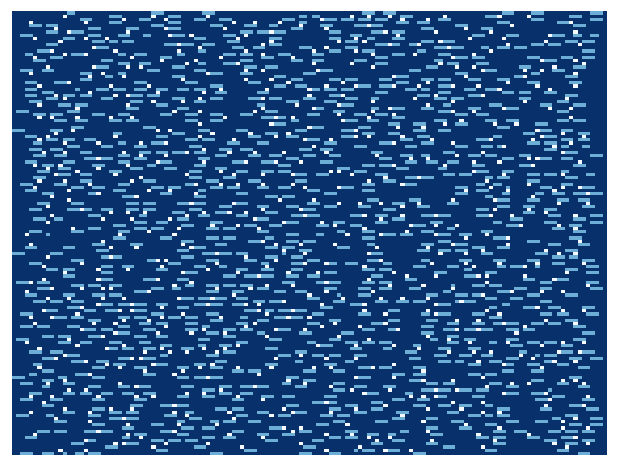

In [13]:
fig, ax = plt.subplots(dpi=120)
ax.pcolormesh(1 * mask_digits + 2 * mask_sym, cmap='Blues_r')
ax.set(ylim=ax.get_ylim()[::-1])
ax.axis('off');